[1.36048374e-04 9.76485943e-05 9.59650085e-05 1.33595642e-04
 1.49071755e-04 1.53838481e-04 1.79669118e-04 1.64705452e-04
 1.41780421e-04 2.23784180e-04 1.80738927e-04]
[0.00176257 0.00183042 0.00527399 0.00274059 0.00742864 0.00500337
 0.00202802 0.00265214 0.00580548 0.00474427 0.00312896]
[0.00011337 0.00014047 0.00011642 0.00014686 0.00015681 0.00010962
 0.00013623 0.00011155 0.00020942 0.00015852 0.00014637]
[0.00358021 0.00221728 0.00183059 0.00210015 0.00222985 0.0014329
 0.00168986 0.02606086 0.00203117 0.00172401 0.00273215]
[2.09129603e-04 1.33503187e-04 1.59697990e-04 1.58896039e-04
 1.47158490e-04 1.29297893e-04 2.09490220e-04 9.77978283e-05
 2.09328292e-04 2.19976191e-04 2.65253542e-04]
[0.00335719 0.00100703 0.00449269 0.00325274 0.00233296 0.00207614
 0.00239959 0.01311387 0.00755546 0.00329476 0.00322615]


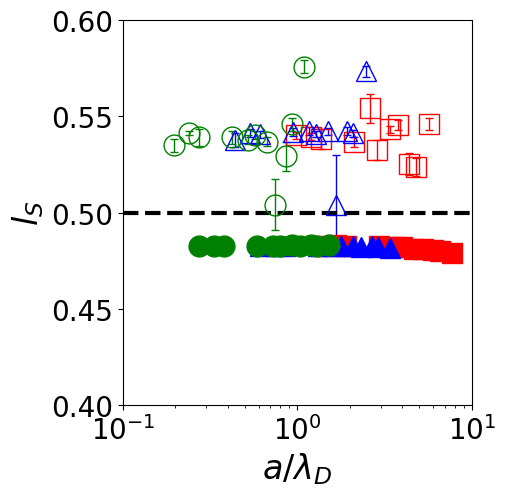

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os


# ---------- Load reference x-data (a/λ_D) ---------- #
x_df = pd.read_csv("a_lambda_d.csv")

# ---------- Color & marker mapping ---------- #
color_map = {'0.2': 'red', '1': 'blue', '5': 'green'}
marker_map = {'0.2': 's', '1': '^', '5': 'o'}

fig, ax = plt.subplots(figsize=(4.5, 5))

def period_calc(omega, omega_err):
    omega = np.array(omega)
    omega_err = np.array(omega_err)
    period = np.pi / omega
    period_err = np.pi * omega_err / (omega**2)
    return np.abs(period), np.abs(period_err)

def power_func(x, A, alpha):
    return A * x**(alpha)

# ---------- Plot for each condition ---------- #
for dtype in ['MD']:
    for eps in ['0.2', '1', '5']:
        for pot in ['LJ', 'WCA']:


            nnname = f"ssfit_params_{dtype}_{eps}_{pot}.csv"
            n_df = pd.read_csv(nnname)

            # --- x = lambda_Z/lambda_N --- #
            x = x_df[f"{eps}_{pot}"]
            x = np.array(x)

            # --- Error propagation --- #
            lambda_N = n_df["omega_fit"].to_numpy()
            lambda_N_err = n_df["omega_fit_error"].to_numpy()

            y_N, y_N_err = period_calc(lambda_N, lambda_N_err)
            # --- Marker style --- #
            filled = (pot == "LJ")

            if dtype == "MD":
                color = color_map[eps]
                zorder_temp = 1000
            else:  # LD dataset
                color = "black"
                zorder_temp=1

            ax.errorbar(
                x, y_N, yerr=y_N_err,
                fmt=marker_map[eps],
                markersize=15,
                color=color,
                mfc=color if filled else 'none',
                mec=color,
                ecolor=color,
                elinewidth=1,
                capsize=3,
                label=f"{eps} {pot}"
            )


# ---------- Axes ---------- #
ax.set_xscale('log')
ax.set_xlim(0.1,10)
ax.set_xlabel(r'${a}/{\lambda_D}$', fontsize=24)
ax.set_ylabel(r'$l_{S}$', fontsize=24)
ax.tick_params(axis='both', which='both', labelsize=20)
plt.axhline(y=0.5, linestyle="--", linewidth=3, color="black")
# plt.ylim (-0.3,3)
plt.ylim(0.4, 0.6)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()


# plt.tight_layout()
plt.show()